#**Preprocesamiento de la base de datos Air Quality Prediction**

El siguiente archivo contiene el preprocesamiento de la base de datos Air Quality Prediction. Esta consta de los siguientes pasos:



1.   Eliminar outliers
2.   Imputar datos NA.
3.   Caracterizar la base de datos.
4.   Normalizar datos.
5.   Separar en datos de entrenamiento y de prueba.
6.   Preparar datos para realizar aprendiza supervizado.

Especificamente en este archivo se realiza el paso 3.

#**Caracterización de la base de datos Air Quality Prediction**

El siguiente archivo contiene los códigos y conclusiones necesarias para caracterizar la base de datos Air Quality Prediction.

Las caracteristicas a analizar son las siguientes:

1.   **Variables endógenas o exógenas**
2.   **Variables univariantes o multivariantes**
3.   **Serie continua o no continua**
4.   **Serie estacionario o no estacionario**
5.   **Serie desestructurada o estructurada**
6.   **Complejidad**



##1 Variables endógenas o exógenas

Para determinar estas variables, el investigador debe analizar y decidir cuales y cuantas existen. A continuación se expone la justificación y las elecciones:

Se considera que la varible endogena corresponde a la variable objetivo "target_4_1601".

Todas las demás corresponden a varibles exogenas. De esta manera, se tiene 1 variable endogena y 45 variables exogenas.

##2 Variables univariantes o multivariantes

Para determinar estas variables, el investigador debe analizar y decidir cuales y cuantas existen. A continuación se expone la justificación y las elecciones:

El problema claramente es multivariante, pero para ser más precisos, se utilizarán 45 variables de entrada y una variable de salida. De esta manera, es problema es multivariable en las entradas y univariante en la salida.

##3 Series con muestreo regular o irregular

Para determinar esta caracteristica, el investigador debe analizar y decidir si la serie es continua o no. A continuación se expone la justificación y la elección:

Se considera que la serie es claramente no continua, ya que existen filas de mediciones faltantes y existe una gran cantidad de valores NA.

##4 Serie estacionario o no estacionario

https://machinelearningmastery.com/time-series-data-stationary-python/

https://towardsdatascience.com/how-to-check-if-our-time-series-is-stationary-or-not-and-why-eb25b1c0ac52

https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0


Para comprobar la estacionariedad de este problema, se realiza la prueba estadistica "Augmented Dickey-Fuller Test (ADF)". El nivel de significancia usado sera de 1%. De esta manera, se contabiliza cuantas series son estacionarias y cuantas no, de tal manera que si si la mayoria de las series son estacionaria, el problema se considera estacionario, analogo para el caso de no estacionariedad. Cabe destacar que del analisis se omiten las primeras 5 columnas, y solo se trabaja con las variables climaticas y la variable objetivo.

In [ ]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
ls gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

Cook/            filterData3.csv    SiteLocations_with_more_sites.csv
filterData1.csv  sample_code.r      SubmissionZerosExceptNAs.csv
filterData2.csv  SiteLocations.csv  TrainingData.csv


In [ ]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [ ]:
ls

Cook/            filterData3.csv    SiteLocations_with_more_sites.csv
filterData1.csv  sample_code.r      SubmissionZerosExceptNAs.csv
filterData2.csv  SiteLocations.csv  TrainingData.csv


In [ ]:
import pandas as pd
dataFilter3 = pd.read_csv('filterData3.csv', header=0)
dataFilter3.head()

chunkID  position_within_chunk  ...  Sample.Min.Baro.Pressure_6005  target_4_1601
0      1.0                    1.0  ...                     740.270042       0.184045
1      1.0                    2.0  ...                     740.256842       0.184045
2      1.0                    3.0  ...                     740.283613       0.184045
3      1.0                    4.0  ...                     740.014957       0.184045
4      1.0                    5.0  ...                     740.067653       0.184045

[5 rows x 46 columns]

In [ ]:
dataFilter3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39360 entries, 0 to 39359
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   chunkID                        39360 non-null  float64
 1   position_within_chunk          39360 non-null  float64
 2   month_most_common              39360 non-null  float64
 3   weekday                        39360 non-null  float64
 4   hour                           39360 non-null  float64
 5   Solar.radiation_64             39360 non-null  float64
 6   WindDirection..Resultant_1     39360 non-null  float64
 7   WindDirection..Resultant_1018  39360 non-null  float64
 8   WindSpeed..Resultant_1         39360 non-null  float64
 9   WindSpeed..Resultant_1018      39360 non-null  float64
 10  Ambient.Max.Temperature_50     39360 non-null  float64
 11  Ambient.Max.Temperature_52     39360 non-null  float64
 12  Ambient.Max.Temperature_57     39360 non-null 

In [ ]:
dataToWork = dataFilter3.iloc[:,:]
#sample = dataToWork.loc[(dataToWork['chunkID'] == 1) & (dataToWork['position_within_chunk'] == posicion)]
sample = dataToWork.loc[(dataToWork['chunkID'] == 1)]
sample = sample.iloc[:,8]
aux = sample.values
print(sample)
print(type(sample))
print(aux)
print(type(aux))

0      0.3
1      0.5
2      0.5
3      0.2
4      0.2
      ... 
187    4.7
188    2.9
189    2.7
190    3.0
191    1.3
Name: WindSpeed..Resultant_1, Length: 192, dtype: float64
<class 'pandas.core.series.Series'>
[0.3 0.5 0.5 0.2 0.2 0.3 0.3 0.8 0.7 1.3 1.5 2.3 2.7 2.6 2.8 3.6 3.3 3.9
 3.9 3.5 3.  2.3 1.8 1.6 0.9 1.1 1.  1.3 0.3 2.3 3.  4.  3.  1.6 3.7 4.3
 4.4 5.4 4.8 4.3 3.6 2.9 3.4 3.2 2.3 1.5 1.6 1.7 0.3 0.3 0.8 1.1 2.2 2.3
 2.  2.  2.3 2.9 4.  5.3 4.6 4.9 5.6 6.4 6.4 6.9 6.8 4.9 3.  3.1 3.1 3.2
 3.  2.8 2.9 3.  2.5 2.4 2.2 1.  1.5 2.  2.3 3.7 4.2 5.  5.9 5.9 5.8 5.6
 5.3 4.1 2.8 2.7 2.2 2.5 2.1 1.1 1.2 1.4 0.3 1.2 2.3 2.8 2.5 3.1 3.5 4.4
 4.3 3.8 3.6 3.8 4.6 4.6 3.8 3.4 2.7 2.9 2.3 1.4 0.5 0.6 0.2 0.1 0.1 0.5
 0.3 0.1 0.3 0.3 0.7 3.  3.9 4.4 4.3 4.6 4.8 3.7 4.2 3.4 2.3 2.8 2.1 0.3
 0.6 1.8 3.  3.6 3.3 3.3 2.9 3.  3.3 2.3 4.3 3.9 4.8 5.6 6.3 5.9 6.3 7.2
 7.5 6.  6.  6.2 6.6 6.9 8.  7.2 5.4 8.7 7.9 5.8 3.6 2.8 3.5 3.4 4.3 4.9
 4.9 5.7 7.1 7.  7.4 6.3 5.9 4.7 2.9 2.7 3.  1.3]
<clas

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller


values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
iterAux = 0
cont = 0
#se crea un arreglo con 3 valores inicializados en 0
# la posicion 0 correspondera a la cantidad de series estacionarias
# la posicion 1 correspondera a la cantidad de series no estacionarias
# la posicion 2 corresponde a la cantidad total de series
resumen = [0,0,0]

#Se va a iterar para cada fragmento de datos y para cada variable
for chunk_id in chunk_ids:
  chunkAux = dataToWork.loc[(dataToWork['chunkID'] == chunk_id)]
  chunkAux = chunkAux.iloc[:,5:]
  for columnName, columnData in chunkAux.iteritems():

    #print('Colunm Name : ', columnName)
    data = columnData.values
    result = adfuller(data)
    if result[1] <= 0.01:
      #print("Rechazar hipotesis nula, datos estacionarios")
      resumen[0] = resumen[0] + 1
      resumen[2] = resumen[2] + 1
    else:
      #print("Aceptar hipotesis nula, datos no estacionarios")
      resumen[1] = resumen[1] + 1
      resumen[2] = resumen[2] + 1
    #print('ADF Statistic: %f' % result[0])
    #print('p-value: %f' % result[1])
    #print('Critical Values:')
    #for key, value in result[4].items():
      #print('\t%s: %.3f' % (key, value))
    #print('Colunm Name : ', columnName)
    #print('Column Contents : ', columnData.values)
    #print('Column type : ',type(columnData))
    #print('Column type : ',type(columnData.values))


print("La cantidad de estacionarios es: ", resumen[0])
print("La cantidad de no estacionarios es: ", resumen[1])
print("La cantidad de series es: ", resumen[2])


La cantidad de estacionarios es:  1230
La cantidad de no estacionarios es:  7175
La cantidad de series es:  8405


La cantidad de series no estacionarias es mayor a la cantidad de series estacionarias, por lo tanto, este problema se caracteriza como no estacionario.

##5 Serie desestructurada o estructurada

Esta caracterista se relaciona con la caracteristica anterior. Si el problema es no estacionario, significa que ls series de tiempo contienen tendencias o patrones estacionales. De esta manera, al definir este problema como no estacionario tambien se define como estrucutrado.

##6 Complejidad

Se utilizan los algoritmos de los siguientes links:

https://github.com/LRydin/MFDFA

https://mfdfa.readthedocs.io/en/latest/1dLevy.html

http://reylab.bidmc.harvard.edu/tutorial/DFA/node5.html

In [ ]:
dataFilter3.describe()

chunkID  ...  target_4_1601
count  39360.000000  ...   39360.000000
mean     105.697561  ...       0.470243
std       60.790022  ...       0.637883
min        1.000000  ...       0.092022
25%       53.000000  ...       0.184045
50%      106.000000  ...       0.368089
75%      159.000000  ...       0.498929
max      210.000000  ...      15.275708

[8 rows x 46 columns]

Primero se realizan pruebas por separado a algunas series de tiempo.

In [ ]:
dataToWork = dataFilter3.iloc[:,:]
#sample = dataToWork.loc[(dataToWork['chunkID'] == 1) & (dataToWork['position_within_chunk'] == posicion)]
sample = dataToWork.loc[(dataToWork['chunkID'] == 1)]
sample = sample.iloc[:,45]
aux = sample.values
print(sample)
print(type(sample))
print(aux)
print(type(aux))

0      0.184045
1      0.184045
2      0.184045
3      0.184045
4      0.184045
         ...   
187    0.092022
188    0.092022
189    0.092022
190    0.276067
191    0.276067
Name: target_4_1601, Length: 192, dtype: float64
<class 'pandas.core.series.Series'>
[0.18404467 0.18404467 0.18404467 0.18404467 0.18404467 0.18404467
 0.18404467 0.18404467 0.18404467 0.18404467 0.27606701 0.27606701
 0.46011168 0.55213401 0.73617868 0.55213401 0.55213401 0.55213401
 0.36808934 0.18404467 0.09202234 0.09202234 0.09202234 0.09202234
 0.09202234 0.09202234 0.09202234 0.09202234 0.09202234 0.09202234
 0.09202234 0.09202234 0.09202234 0.18404467 0.27606701 0.60616427
 0.66335812 0.64484773 1.10426802 0.73617868 0.18404467 0.09202234
 0.09202234 0.55213401 0.92022335 0.55213401 0.27606701 0.09202234
 0.43935098 0.09202234 0.09202234 0.18404467 0.09202234 0.09202234
 0.09202234 0.09202234 0.18404467 0.92022335 0.73617868 1.19629036
 1.74842437 3.49684874 2.02449138 1.10426802 0.73617868 0.82820102
 0

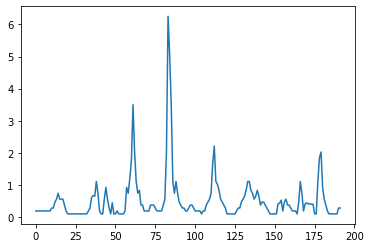

In [ ]:
from matplotlib import pyplot as plt

plt.plot(aux)
plt.show()

In [ ]:
pip install MFDFA

In [ ]:
# Imports
from MFDFA import MFDFA
from MFDFA import fgn
import numpy as np

# Select a band of lags, which usually ranges from
# very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
lag = lag[0:37]
print(lag)
print(lag.shape)
# Notice these must be ints, since these will segment
# the data into chucks of lag size

# Select the power q
q = 2

# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(aux, lag = lag, q = q, order = order)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 27 28
 30 32 34 36 38 40 43 45 48 51 54 57 61]
(37,)


[1.31533311]
[-4.07322671]


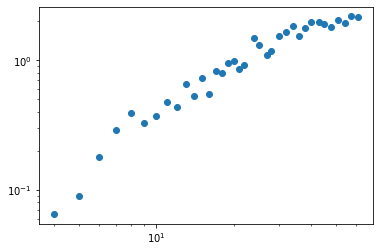

In [ ]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')



# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
slope, intercept = np.polyfit(np.log(lag[:30]), np.log(dfa[:30]),1)

print(slope)

In [ ]:
# Select a band of lags, which are ints
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
lag = lag[0:37]
print(lag.shape)

# Select a list of powers q
#q_list = [-10,-5,-2, 2, 5, 10]
q_list = [1, 2, 5, 8, 10]


# The order of the polynomial fitting
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(aux, lag = lag, q = q_list, order = order)

(37,)


<class 'numpy.ndarray'>
(36, 5)
1.15


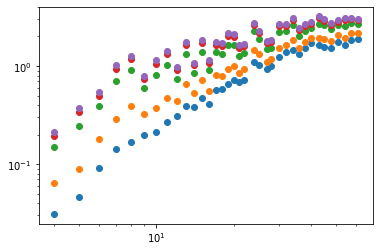

In [ ]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=[2, 5, 10]')

print(type(dfa))
print(dfa.shape)

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
slope, intercept = np.polyfit(np.log(lag[:30]), np.log(dfa[:30]),1)

mediaAux = round(np.mean(slope),2)
print(mediaAux)

Se procede a calcular la complejidad de todas las series de tiempo y a obtener un promedio de complejidad para el problema.

In [ ]:
# Select a band of lags, which are ints
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
lag = lag[0:37]

# Select a list of powers q
q_list = [1, 2, 5, 8, 10]


# The order of the polynomial fitting
order = 2

values = dataToWork.values
chunk_ids = np.unique(values[:, 0])
iterAux = 0
cont = 0
#se crea un arreglo con 2 valores inicializados en 0
# la posicion 0 correspondera a la suma de complejidades de la series
# la posicion 1 correspondera a la cantidad de series analizadas
resumen = [0,0]

#Se va a iterar para cada fragmento de datos y para cada variable
for chunk_id in chunk_ids:
  chunkAux = dataToWork.loc[(dataToWork['chunkID'] == chunk_id)]
  chunkAux = chunkAux.iloc[:,5:]
  for columnName, columnData in chunkAux.iteritems():

    #print('Colunm Name : ', columnName)
    data = columnData.values
    # Obtain the (MF)DFA as
    lag, dfa = MFDFA(data, lag = lag, q = q_list, order = order)
    # And now we need to fit the line to find the slope. We will
    # fit the first points, since the results are more accurate
    # there. Don't forget that if you are seeing in log-log
    # scales, you need to fit the logs of the results
    H = np.polyfit(np.log(lag[:30]), np.log(dfa[:30]),1)[0]
    mediaAux = round(np.mean(H),2)
    resumen[0] = resumen[0] + mediaAux
    resumen[1] = resumen[1] + 1

Hfinal = resumen[0]/resumen[1]

print("La complejidad fractal del problema en promedio es: ", Hfinal)

La complejidad fractal del problema en promedio es:  1.7997299226650838


Sabemos que: 

"El exponente de escala generalizado lejos del nivel desordenado 0.5 representa una gran capacidad de memorización del sistema, es decir, los datos observados se encuentran en un nivel bajo de complejidad con una alta persistencia o auto similitud a largo plazo." (Paper de complejidades series de tiempo)

Por lo tanto, la complejidad de la series de tiempo de este problema es baja.

Links que ayudaron a entender el método MFDFA: 

https://archive.physionet.org/tutorials/fmnc/index.shtml
https://en.wikipedia.org/wiki/Detrended_fluctuation_analysis